In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
ID_141_2018=pd.read_csv('//srv-mla/MLA_ADP2022/Tags_2018/TagID_141_2018.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_58_2018=pd.read_csv('//srv-mla/MLA_ADP2022/Tags_2018/TagID_058_2018.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
ID_141_2018['TagValue']=ID_141_2018.CreateDateTime.diff(2).dt.total_seconds()
ID_141_2018

,CreateDateTime,TagValue,TagId
0,2018-10-09 18:07:43.914,NaN,141
1,2018-10-10 10:24:50.690,NaN,141
2,2018-10-10 10:25:19.174,58655.260,141
3,2018-10-10 10:38:57.331,846.641,141
4,2018-10-10 10:46:23.305,1264.131,141
...,...,...,...
55905,2018-12-21 00:40:23.180,129.512,141
55906,2018-12-21 00:42:31.785,129.605,141
55907,2018-12-21 00:42:32.794,129.614,141
55908,2018-12-21 00:44:41.391,129.606,141


<AxesSubplot:xlabel='CreateDateTime'>

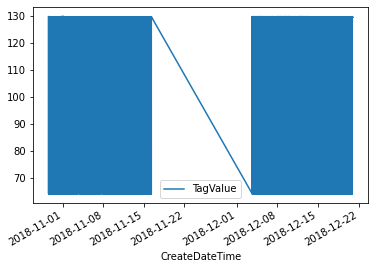

In [4]:
ID_141_2018=ID_141_2018[ID_141_2018['TagValue']<140]
ID_141_2018.plot('CreateDateTime','TagValue')

In [5]:
ID_58_141_2018=ID_58_2018.set_index('CreateDateTime').join(ID_141_2018.set_index('CreateDateTime'),lsuffix='_l', rsuffix='_r',how='outer')
#ID_58_141_2018=ID_58_141_2018.interpolate()
ID_58_141_2018=ID_58_141_2018.fillna(method="ffill")


In [6]:
df=ID_58_141_2018.dropna()
df

,TagValue_l,TagId_l,TagValue_r,TagId_r
CreateDateTime,,,,
2018-10-29 13:44:33.664,-1.041667,58.0,129.701,141.0
2018-10-29 13:44:33.674,0.578704,58.0,129.701,141.0
2018-10-29 13:44:34.673,0.578704,58.0,129.700,141.0
2018-10-29 13:44:34.683,-0.896991,58.0,129.700,141.0
2018-10-29 13:44:35.691,-0.868056,58.0,129.700,141.0
...,...,...,...,...
2018-12-31 23:31:57.991,-1.302083,58.0,129.599,141.0
2018-12-31 23:48:41.412,-1.331019,58.0,129.599,141.0
2018-12-31 23:48:42.413,-1.302083,58.0,129.599,141.0


Pandas computed Pearson r: -0.048426149754315556
Scipy computed Pearson r: -0.048426149754433705 and p-value: 0.0


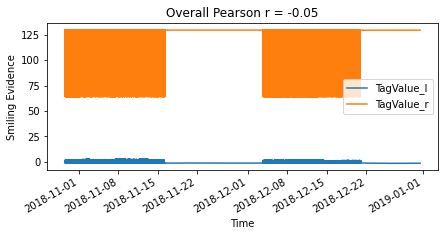

In [7]:
overall_pearson_r = df.corr().iloc[0,2]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# mit Pandas rechnen Pearson r：0.2058774513561943

r, p = stats.pearsonr(df.dropna()['TagValue_l'], df.dropna()['TagValue_r'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# mit Scipy rechnen Pearson r：0.20587745135619354， p-value：3.7902989479463397e-51


df2=df[['TagValue_l','TagValue_r']]
f,ax=plt.subplots(figsize=(7,3))
df2.rolling(window=150,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Smiling Evidence')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}")
plt.show()

Text(0.5, 0.98, 'Smiling data and rolling window correlation')

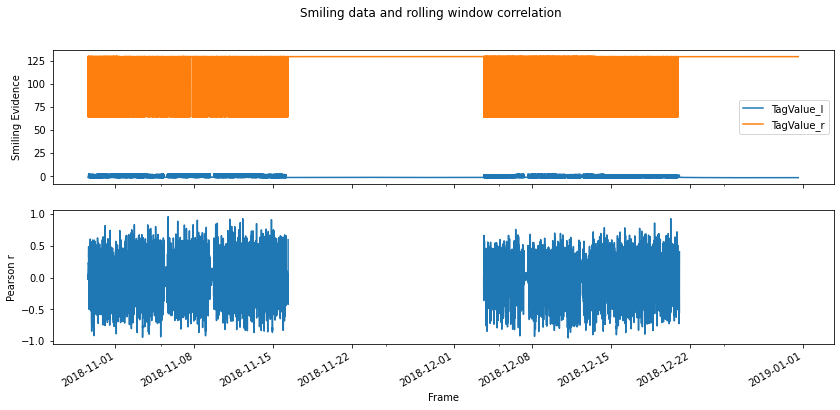

In [8]:
r_window_size = 600

df_interpolated = df2.interpolate()

rolling_r = df_interpolated['TagValue_l'].rolling(window=r_window_size, center=True).corr(df_interpolated['TagValue_r'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df2.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Smiling Evidence')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")

In [9]:
df=df[(df.index>'2018-11-01 07:00:00')&(df.index<'2018-11-15 00:00:00')]
overall_pearson_r = df.corr().iloc[0,2]
print(f"Pandas computed Pearson r: {overall_pearson_r}")


r, p = stats.pearsonr(df.dropna()['TagValue_l'], df.dropna()['TagValue_r'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: 0.0016537803660265314
Scipy computed Pearson r: 0.0016537803660268907 and p-value: 0.1491923899725113


Text(0.5, 0.98, 'Smiling data and rolling window correlation')

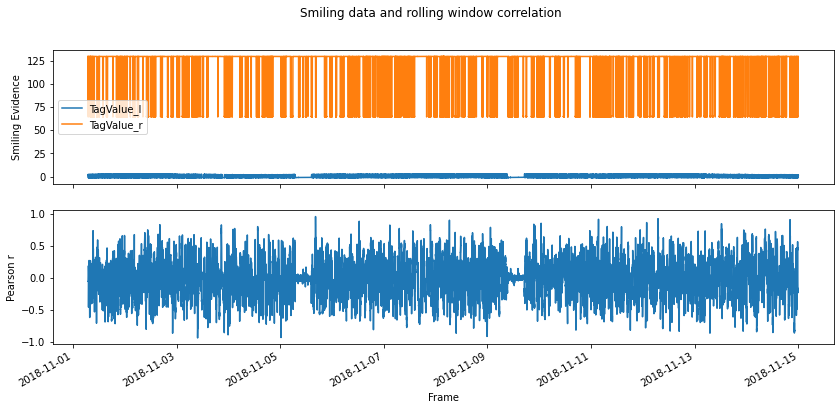

In [10]:
df2=df[['TagValue_l','TagValue_r']]
r_window_size = 600

df_interpolated = df2.interpolate()

rolling_r = df_interpolated['TagValue_l'].rolling(window=r_window_size, center=True).corr(df_interpolated['TagValue_r'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df2.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Smiling Evidence')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")

Pandas computed Pearson r: -0.0030429813587177644
Scipy computed Pearson r: -0.0030429813587180164 and p-value: 0.5473684192569547


Text(0.5, 0.98, 'Smiling data and rolling window correlation')

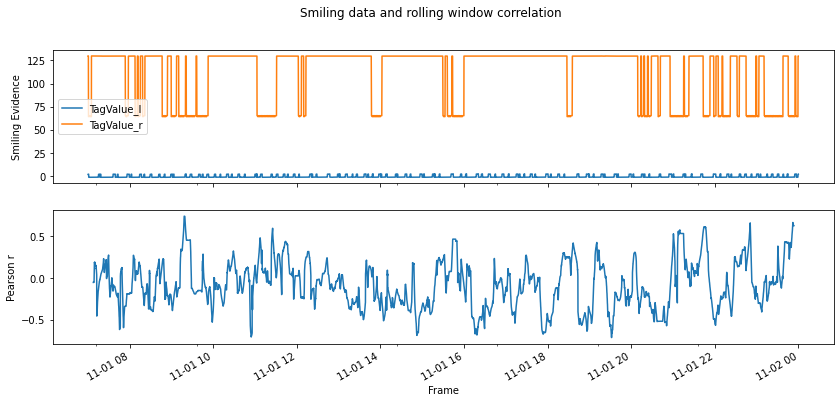

In [11]:
df=df[(df.index>'2018-11-01 07:00:00')&(df.index<'2018-11-02 00:00:00')]
overall_pearson_r = df.corr().iloc[0,2]
print(f"Pandas computed Pearson r: {overall_pearson_r}")


r, p = stats.pearsonr(df.dropna()['TagValue_l'], df.dropna()['TagValue_r'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

df2=df[['TagValue_l','TagValue_r']]
r_window_size = 600

df_interpolated = df2.interpolate()

rolling_r = df_interpolated['TagValue_l'].rolling(window=r_window_size, center=True).corr(df_interpolated['TagValue_r'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df2.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Smiling Evidence')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")